PREDICTING VEGETABLE SALES TREND.

![Vegetables](Vegetables.jpg)



OVERVIEW

This project is addressing the issue of predicting sales trends for various vegetables sold across different retail chains. The goal is be to provide insights that can help these retail chains optimize their inventory management and pricing strategies.

BUSINESS PROBLEM 

Predicting the sales of specific vegetables based on historical data and current market conditions.

DATA UNDERSTANDING

For this Analysis i will be using Vegatable retail chain data from Kaggle using the link  [see link](https://www.kaggle.com/datasets/whikechen/simple-vegetable-sale,https://www.kaggle.com/code/ahmadwaleed1/vegetable-retail-chains-eda)

 

Importation

In [37]:

#importation of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
from matplotlib.dates import DateFormatter


Data Preprocessing


In [38]:
#importation of Data

#df=pd.read_csv('simple_vegetable_sales_data.csv')
df1=pd.read_csv('Vegetable_market.csv')
df1

df1.info()

# #Removing 'Month' column
# column_to_remove = 'Month'
# if column_to_remove in df1:
#     df1.drop(column_to_remove, axis=1, inplace=True)

# Save the modified DataFrame back to a CSV file
df1.to_csv('modified_file.csv', index=False)
#Confirming column was removed
print(df1.columns)

# Reading the first CSV file into a DataFrame
df = pd.read_csv('simple_vegetable_sales_data.csv')

# Reading the second CSV file
df1 = pd.read_csv('Vegetable_market.csv') 

# Concatenating dataframes along the rows
combined_df = pd.concat([df, df1], ignore_index=True)

# Saving the combined data to a new CSV file
combined_df.to_csv('combined_files.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vegetable                        121 non-null    object
 1   Season                           121 non-null    object
 2   Month                            121 non-null    object
 3   Temp                             121 non-null    int64 
 4   Deasaster Happen in last 3month  121 non-null    object
 5   Vegetable condition              121 non-null    object
 6   Price per kg                     121 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.7+ KB
Index(['Vegetable', 'Season', 'Month', 'Temp',
       'Deasaster Happen in last 3month', 'Vegetable condition',
       'Price per kg'],
      dtype='object')


Data Cleaning

In [39]:
#DATA CLEANING
#combined_df.isna().sum()

# Check the shape (rows and columns) of the combined dataset
#print("Combined Dataset Shape:", combined_df.shape)

combined_df.info() 

#Checking for missing/null values
#combined_df.isnull().sum()
#df.dropna(inplace=True) #Removing rows with missing values

#Filling

# Assuming combined_df is your DataFrame
filled_data = combined_df['Price per kg'].fillna(np.mean(combined_df['Price per kg']), inplace=True)
filled_data = combined_df['Sales(kg)'].fillna(np.mean(combined_df['Sales(kg)']), inplace=True)

#Checking for missing/null values
combined_df.isnull().sum()

#checking for duplicates
#combined_df.duplicated().sum()
#Remove Duplicate
df_no_duplicates = combined_df.drop_duplicates()

# Drop rows with any null values
cleaned_df = combined_df.dropna()

# Drop columns with any null values
cleaned_df = combined_df.dropna(axis=1)

# Fill null values with a specific value
filled_df = combined_df.fillna(0)

# # Display a summary of the merged dataset
# print(combined_df.info())
# print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            481 non-null    object 
 1   Sales(kg)                        360 non-null    float64
 2   Supplier_Name                    360 non-null    object 
 3   Vegetable                        121 non-null    object 
 4   Season                           121 non-null    object 
 5   Temp                             121 non-null    float64
 6   Deasaster Happen in last 3month  121 non-null    object 
 7   Vegetable condition              121 non-null    object 
 8   Price per kg                     121 non-null    float64
dtypes: float64(3), object(6)
memory usage: 33.9+ KB


Data Analysis

In [40]:
#Seasonal demand analysis

# # Group data by month and season, summing the sales for each combination
# seasonal_sales = combined_df.groupby(['Month', 'Season', 'Vegetable'])['Sales(kg)'].sum().reset_index()

# # Find the most sold vegetable per season
# top_selling_per_season = combined_df.loc[combined_df.groupby('Season')['Sales(kg)'].idxmax()]

# print("Top selling vegetable per season:")
# print(top_selling_per_season)# Display the top-selling vegetable per season


# # Calculate total sales per month
monthly_sales = combined_df.groupby(['Month'])['Sales(kg)'].sum()

# Display total sales per month
print("\nTotal sales per month:")
print(monthly_sales)



Total sales per month:
Month
1         37489.240000
2         45818.060000
3         51292.070000
4         58309.220000
5         63525.620000
6         68918.820000
7         72426.710000
8         75437.250000
9         76553.770000
10        76810.810000
11        76081.910000
12        74015.030000
13        70419.810000
14        66435.440000
15        61500.770000
16        54727.660000
17        47969.750000
18        41755.470000
19        36266.210000
20        27663.780000
21        21234.690000
22        16599.840000
23         9151.650000
24         5794.390000
25         2696.980000
26          993.620000
27         1374.250000
28          762.350000
29         2567.630000
30         4910.010000
31         7679.740000
32        12392.590000
33        17723.330000
34        25998.520000
35        30735.710000
36        38243.350000
          11518.967083
apr       92151.736667
aug       26877.589861
dec       26877.589861
jan      207341.407500
july      42236.212639
june

Data Visualization

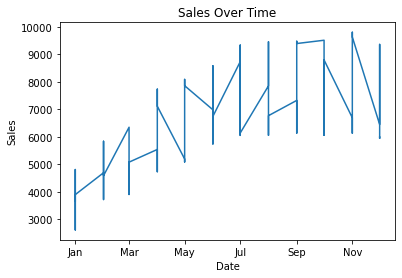

In [41]:
#Creating a line plot showing sales over time

# Create a dictionary that maps numerical months to their abbreviations
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Map the numerical months to their abbreviations
combined_df['Month'] = combined_df['Month'].map(month_dict)

# Convert the 'Month' column to datetime objects
combined_df['Month'] = pd.to_datetime(combined_df['Month'], format='%b')

# Sort the DataFrame by 'Month'
combined_df = combined_df.sort_values('Month')

# Convert the DataFrame to a numpy array
months = combined_df['Month'].to_numpy()
sales = combined_df['Sales(kg)'].to_numpy()

# Plot the data
plt.plot(months, sales)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

# Format the x-axis as dates
ax = plt.gca()
date_format = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_format)

plt.show()





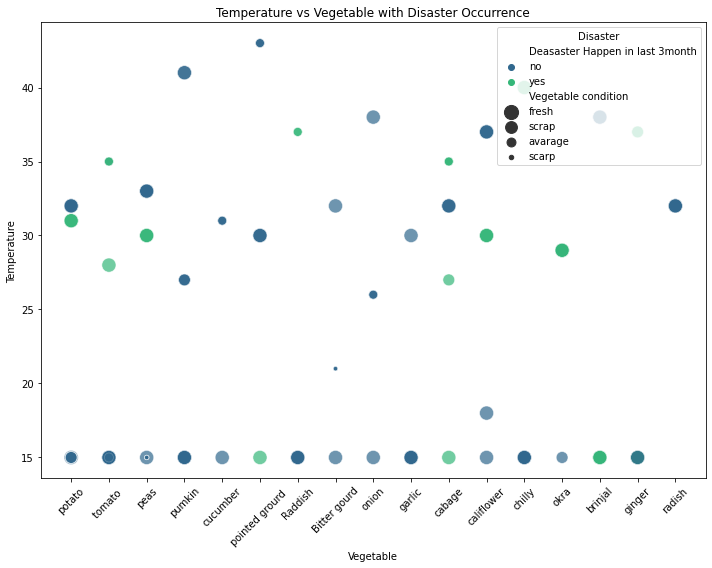

In [42]:

#Scatter plot visualizing how temperature varies concerning different vegetables with points colored based on disaster occurence and sized based on vegetable conditions
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Vegetable', y='Temp', hue='Deasaster Happen in last 3month', size='Vegetable condition',
                sizes=(20, 200), alpha=0.7, data=combined_df, palette='viridis')
plt.title('Temperature vs Vegetable with Disaster Occurrence')
plt.xlabel('Vegetable')
plt.ylabel('Temperature')
plt.legend(title='Disaster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Visualization shows how the temprature varies with different vegatables, considering the occurence of disasters and the condition of the vegatables.
#Radish ,bitter guard,onions have not incured any disaster in the last 3months and they grow well in all conditions
#Not that Califlower has lower temps when there is no disaster whereas Danish and onions have how temp with no disaster
#Most vegatables grow at a temp of between 25-35

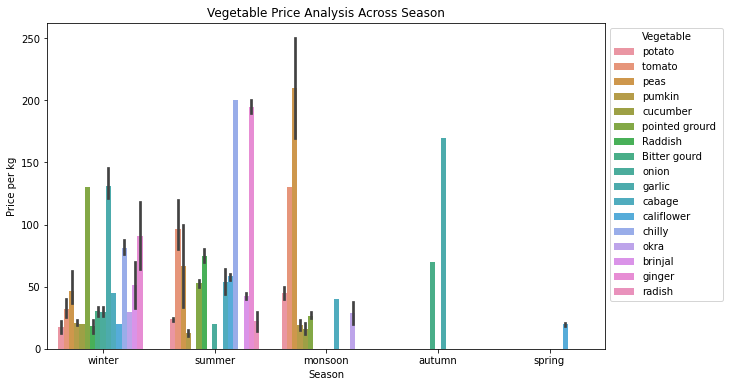

In [43]:
# Grouped Bar Chart visual representation of price analysis of different vegatables across seasons
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.barplot(x='Season', y='Price per kg', hue='Vegetable', data=combined_df)
plt.title('Vegetable Price Analysis Across Season')
plt.xlabel('Season')
plt.ylabel('Price per kg')
plt.legend(title='Vegetable', bbox_to_anchor=(1, 1), loc='upper left')  # Adjust legend position

plt.show()
#Each bar represents a season, divided into segments representing different vegatable making it easy to compare prices across both seasons and different types of vegetables at a glance
#Vegetables like Tomatoes,peas do weel during monsoon season whereas brinjal,ginger okra do well during the summer
#Prices of differnt vegetables tend to go higher during late summer and early monsoon season 
#Onions have high prices in during autum

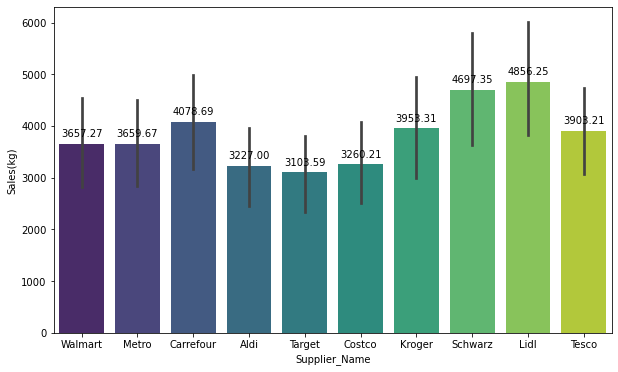

In [44]:
#Visualization
#Bar plot  visualizing comparing sales performance(kg) of different suppliers
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Supplier_Name', y='Sales(kg)', data=combined_df, estimator=np.mean, palette='viridis')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
    #Iterating over all the bars in the plot, for each bar it annotates the bar with the corresponding sales value formated to 2 decimal points
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')
plt.show()


#Lidi has the highest sales of 4865.25 followed bt Shwarz with 4697.35
#Target has the lowest sales

In [45]:
#Visualizing mean sales per supplier across different months using Plotly express
#
supplier_means = df.pivot_table(values='Sales(kg)', index='Month', columns='Supplier_Name', aggfunc='mean')

# Resetting index to ensure 'Month' becomes a column (optional, depending on the DataFrame structure)
supplier_means = supplier_means.reset_index() #Used reset_index() method to reset the index of the pivot tables

# Melt the DataFrame to transform 'Supplier_Name' columns into a single column for the line plot
melted_supplier_means = supplier_means.melt(id_vars='Month', var_name='Supplier_Name', value_name='Mean_Sales') #used met() function to tranform the pivot table so that 'Supplier_name' becomes a single column
#ploting a line plot
fig = px.line(melted_supplier_means, x='Month', y='Mean_Sales', color='Supplier_Name',
              title='Mean Sales per Supplier across Months',
              labels={'Month': 'Month', 'Mean_Sales': 'Mean Sales', 'Supplier_Name': 'Supplier'})
fig.show()
   
#Sales increase from the 5th to 15 month and saes started decreasing from the 20th to 30th month

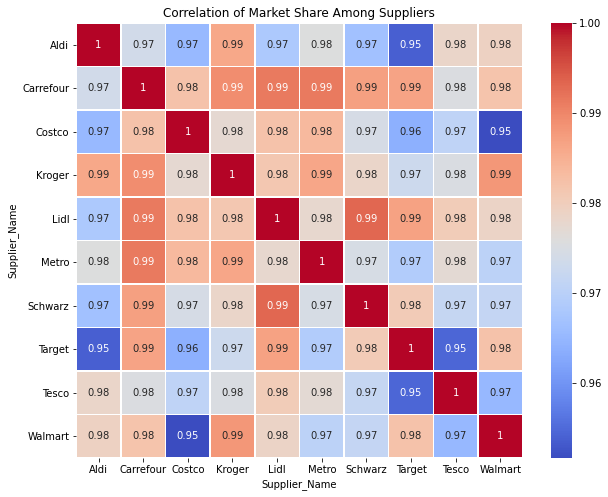

In [46]:
#Heatmap showing how the sales of different suppliers correlate with each other over time.
pivot_table = combined_df.pivot_table(index='Month', columns='Supplier_Name', values='Sales(kg)', aggfunc='sum')

# Calculate the correlation matrix among suppliers' market supply
correlation_matrix = pivot_table.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Market Share Among Suppliers')
plt.show()

# Two suppliers with hight positive correlation means that when one supplier has high sales, the other also tends to have high sales
# When two suppliers have high negative correlation e.g  Metro & Walmart, it means that when one supplier has high sales, the other tends to have low sales

Conclusion



1. Seasonal Trends:
   - The bar chart effectively illustrates seasonal patterns, allowing easy comparison of prices across seasons and different vegetable types.
   - Certain vegetables, such as tomatoes and peas, perform well during the monsoon season, while brinjal, ginger, and okra thrive in the summer.
   - Prices for different vegetables tend to peak during late summer and early monsoon seasons.
   - Onions exhibit higher prices during autumn.

2. Sales Patterns:
   - Lidi stands out with the highest sales of $4865.25, followed by Schwarz with $4697.35.
   - Sales generally increase from the 5th to the 15th month but start decreasing from the 20th to the 30th month.
   - Target has the lowest sales among the observed vendors.

3. Supplier Relationships:
   - Positive correlation between two suppliers suggests that when one has high sales, the other tends to have high sales as well.
   - Negative correlation, as seen with Metro and Walmart, indicates that when one supplier has high sales, the other tends to have low sales.



These conclusions provide a starting point for deeper analysis and potentially inform strategic decisions for businesses involved in the sale of vegetables. Further analysis and predictive modeling can be undertaken to develop a more comprehensive understanding of the factors influencing vegetable sales.

Recommendations/Implications


   - Businesses may want to adjust their inventory and marketing strategies based on seasonal variations, focusing on the specific vegetables that perform well during certain seasons.
   - Pricing strategies should take into account the observed peaks in vegetable prices during late summer and early monsoon seasons.
   - The decline in sales during the later months could prompt further investigation into potential factors affecting customer behavior.